# ECE 435/535 - GD Computational Lab

## Name: Amir Reza Vazifeh

## Unconstrained Optimization Using Gradient Descent

In this homework, we will examine the minimization of functions using gradient descent. We examine the convergence rate for convex and strongly convex functions. We also note that the convergence rate depends on the characteristics of the problem.

Credits: Parts 1 and 2 of this assignment have been adapted from practicals by Francis Bach, Alexandre d'Aspremont, Pierre Gaillard and Aude Genevay.

## Preliminaries

### Gradient Descent

Let $f\colon \mathbb{R}^n \rightarrow \mathbb{R}$ be differentiable with gradient $\nabla f(x)$. Gradient descent attempts to find a local minimum of $f$ using the iterative algorithm:
$$
x_{t+1} = x_t -\gamma \nabla f(x_t),\quad x_0\in \mathbb{R^n}.
$$

In order to ensure convergence to a local minimum the fixed step size $\gamma$ can't be too big. The standard fixed step size is $\gamma = 1/L$  where $L$ is a uniform upper bound on the largest eigenvlaue of $\nabla^2f(x)$.
    
### Linear Convergence

When the rate of convergence of an iterative optimization algorithm satisfies

$$
|f(x_t)-f(x^\star)| \leq C \alpha ^t
$$

for some constant $0< \alpha <1$, the error $|f(x_t)-f(x^\star)|$ converges to $0$ exponentially in $t$. By taking logs of both sides you see that

$$
\log (|f(x_t)-f(x^\star)|)\leq t \log(\alpha) + \log (C).
$$

This is also termed "linear convergence".

### Ridge Regression

We will examine the ridge regression problem:

$$\min_{x \in \mathbb{R}^n}\  f(x) = \frac{1}{2m}\|y - F x\|^2+\frac{\lambda}{2} \|x\|^2$$

Here $F \in \mathbb{R}^{m \times n}$ is a given matrix and $y \in \mathbb{R}^m$ is a given vector. The constant $\lambda$ is a hyperparameter that weights the relative importance of the second term versus the first in $f(x)$. The function to be minmized is a quadratic function of $x$.

We have selected this problem as a testbed since it has a known solution. The optimal $x^\star$ for the ridge regression problem is

$$
x^\star = (F^T F + m\lambda I)^{-1}F^T y.
$$

What we want to explore the convergence rate of gradient descent to the known solution.

### Before Starting the Computational Exercises

You will need to find: $\nabla f(x)$ and $\nabla^2 f(x)$ for the ridge regression problem. Also consider whether $f(x)$ is strongly convex.

ANS: $\nabla f(x) =
\frac{1}{m}(-F^Ty+F^TFx) + \lambda x$

Proof:
$f(x) = \frac{1}{2m}\|y - F x\|^2+\frac{\lambda}{2} \|x\|^2 = \frac{1}{2m}(y-Fx)^T(y-Fx) + \frac{\lambda}{2} x^Tx = \frac{1}{2m} (y^Ty-y^TFx-x^TF^Ty+x^TF^TFx) + \frac{\lambda}{2} x^Tx$

$ →\nabla f(x) = \frac{1}{2m}(-2F^Ty+2F^TFx) + \lambda x =  \frac{1}{m}(-F^Ty+F^TFx) + \lambda x$


ANS: $\nabla^2f(x) = \frac{1}{m}F^TF + \lambda I_{n×n}$

Proof:
$ \nabla f(x) = \frac{1}{m}(-F^Ty+F^TFx) + \lambda x → \nabla^2f(x) = \frac{1}{m}F^TF + \lambda I_{n×n}$

ANS: $f(x)$ is strongly convex since the Hessian matrix is positive definite at all points on set $\mathbb{R}^n - 𝟘_n.$

Proof: For a function f whose second derivatives are continuous, the Hessian matrix can be used for determining its convexity and concavity. If the Hessian matrix is **positive semi-definite** at all points on set A, then the function is **convex** on set A.  The function is **strictly convex** if the Hessian matrix is **positive definite** at all points on set A.

To show that the Hessian matrix is positive definite, we need to show for all $x \in \mathbb{R}^n - 𝟘_n$, we have $x^T(\nabla^2f(x))x >0$

$→ x^T(\nabla^2f(x))x = x^T(\frac{1}{m}F^TF + \lambda I_{n×n})x = \frac{1}{m}(x^TF^TFx) + \lambda x^Tx = \frac{1}{m}||Fx||^2 + \lambda ||x||^2$

The first term $||Fx||^2$ is always non-negative. If the null-space of F is empty, then $||Fx||^2$ is always positive. In addition, the second term is always positive for all $x \in \mathbb{R}^n - 𝟘_n$. Therefore, the entire expression is strictly positive. Hence, $f(x)$ is strongly convex.

# Computational Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig, cond

%matplotlib inline

## 1. Warm-up: strongly convex versus strictly convex

### Two scalar functions

(a) Write a python function to compute and return $f_1(x)=x^2$ and $\nabla f_1(x)$.

(b) Write python function to compute and return $f_2(x)=x^4$ and $\nabla f_2(x)$.

(c) Code a gradient descent algorithm that calls the appropriate functions defined above and computes the minimum of the function. Use a step size $\gamma = 0.1$, a maximum of $200$ interations, and stopping criterion $|\nabla f(x)|< \epsilon =10^{-3}$.

(d) Plot $|x_t-x^\star|$ versus the number of iterations $t$, where $x_t$ is the $t$-th iterate of gradient descent and $x^\star$ is the known solution. To display the convergence speed of the algorithms, plot in a logarithmic scale. For this you may find the Python functions `semilogx, semilogy, loglog` useful. Display convergence plots for both functions on one graph. How and why are the plots different?

**Ans (d):**  We see that $f_2(x)=x^4$ requires more number of iterations for convergence using gradient descent than $f_1(x)=x^2$. Gradient descent attempts to find a local minimum of $f$ using the iterative algorithm:

$$
x_{t+1} = x_t -\gamma \nabla f(x_t),\quad x_0\in \mathbb{R^n}
$$

For $f_1(x) = x^2$, the $\nabla f_1(x)=2x$. Since the gradient is linear, the updates will be proportional to the current value of $x_t$. However, For $f_2(x) = x^4$, the $\nabla f_2(x)=4x^3$. **The steepness of gradient $4x^3$ can cause the updates to become more aggressive when $x_t>1$, potentially overshooting the minimum and oscillating around it. Moreover, when $x_t < 1$, the updates will be much more damped than $\nabla f_1(x)=2x$. Hence, convergence requires more iterations than $f_1(x)$.** If we use a larger learning rate for $f_2(x)$, we will see that the convergence is being done in less number of iterations.  

In [2]:
# Objective function 1: f1(x) = x^2
def f1(x):
    return x**2

# Gradient of f1(x) = x^2
def grad_f1(x):
    return 2*x

# Objective function 2: f2(x) = x^4
def f2(x):
    return x**4

# Gradient of f2(x) = x^4
def grad_f2(x):
    return 4*x**3

# Gradient Descent algorithm
def gradient_descent(f, grad_f, gamma, n_iter_max, eps, x_init):
    x = x_init
    x_values = [x]
    for t in range(1, n_iter_max + 1):
        gradient = grad_f(x)
        x = x - gamma * gradient
        x_values.append(x)
        if np.linalg.norm(gradient) < eps:
            print(f"Converged in {t} iterations.")
            break
    else:
        print("Did not converge within the maximum number of iterations :(")

    return x_values, t

f1(x): 
Converged in 36 iterations.
------------------------------------------
f2(x) with gamma = 0.1: 
Did not converge within the maximum number of iterations :(
------------------------------------------
f2(x) with gamma = 0.2: 
Converged in 143 iterations.
------------------------------------------


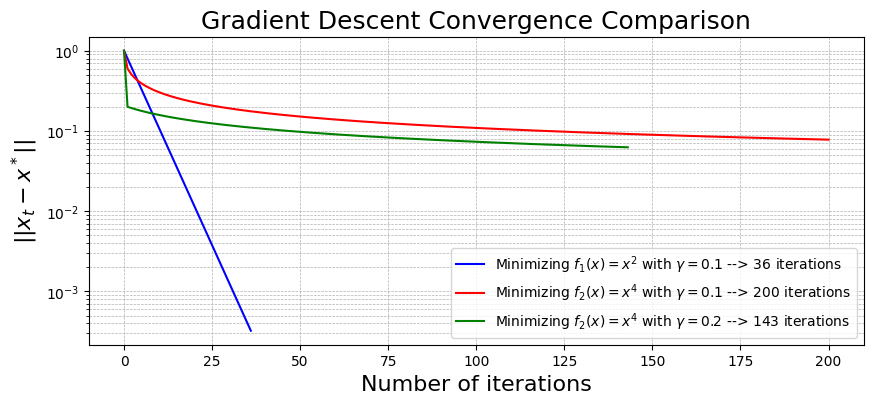

In [3]:
# GD Parameters
gamma = 0.1
n_iter_max = 200
eps = 10**(-3)

# Initialisation
x_init = 1.0

# f_star
x_star = 0.0  # For both functions, the minimum is at x=0

# Run gradient descent for f1(x)
print("f1(x): ")
x_values_f1, t1 = gradient_descent(f1, grad_f1, gamma, n_iter_max, eps, x_init)
print("------------------------------------------")

# Run gradient descent for f2(x)
print("f2(x) with gamma = 0.1: ")
x_values_f2, t2 = gradient_descent(f2, grad_f2, gamma, n_iter_max, eps, x_init)
print("------------------------------------------")

# Run gradient descent for f2(x)
print("f2(x) with gamma = 0.2: ")
x_values_f2_2, t3 = gradient_descent(f2, grad_f2, 2*gamma, n_iter_max, eps, x_init)
print("------------------------------------------")

# Plot convergence

# Create a single figure
plt.figure(figsize=(10, 4))

# Plot convergence for f1(x)
plt.semilogy(np.abs(np.array(x_values_f1) - x_star), label=f"Minimizing $f_1(x) = x^2$ with $\gamma=0.1$ --> {t1} iterations", color="blue")

# Plot convergence for f2(x)
if (t2 == n_iter_max):
  plt.semilogy(np.abs(np.array(x_values_f2) - x_star), label=f"Minimizing $f_2(x) = x^4$ with $\gamma=0.1$ --> {t2} iterations", color="red")

# Plot convergence for f2(x)
plt.semilogy(np.abs(np.array(x_values_f2_2) - x_star), label=f"Minimizing $f_2(x) = x^4$ with $\gamma=0.2$ --> {t3} iterations", color="green")

# Set labels and title
plt.xlabel('Number of iterations', fontsize=16)
plt.ylabel('$||x_t - x^*||$', fontsize=16)
plt.title("Gradient Descent Convergence Comparison", fontsize=18)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show the plot
plt.show()


## 2. Ridge Regession

### Step 1: Generate F and y

(a) Generate a random matrix $F \in \mathbb{R}^{m \times n}$ of size $m=50$ and $n=60$ where each row of $F$ belongs to $[0,1]^n$. The numpy cammand `np.random.rand` may be useful. Note that $F$ will have linearly dependent columns. Why?

ANS: If we consider a set of $n=60$ vectors, $v_1$ through $v_{60}$, in a space $\mathbb{R^{50}}$, when the number of vectors $n=60$ exceeds the dimensionality of the space $m=50$, it is inevitable that these vectors are linearly dependent. For linear independence, there should be a pivot in each column, and in this case, with $n>m$, we will have linear dependence among the vectors.

(b) Model $y$ as $Fx + w$ where $x\in \mathbb{R}^n$ and $w$ is a normally distributed noise vector in $\mathbb{R}^m$. Generate $x \in [0,1]^n$. Then generate a target vector $y \in \mathbb{R}^m$. The numpy command `random.randn` may be useful.

In [4]:
"Code for Step 1: Generating F and y"

# Function to generate random matrix F and vector y
def generate_data(n, m):
    F = np.random.rand(m, n)
    x = np.random.rand(n)
    w = np.random.randn(m)
    y = np.dot(F, x) + w
    return F, y, x

n = 60
m = 50
F, y, x = generate_data(n, m)

### Step 2: Numerically compute the solution of ridge regression

(a) Numerically compute the largest eigenvalue and smallest eigenvalue of $\nabla^2 f(x) = P = \frac{1}{m}F^T F + \lambda I$. These will be used to set the constant step size in gradient descent and to bound the rate of convergence.

In addition, compute and display the condition number of the matrix:
$$\frac{\lambda_{\max}(P)}{\lambda_{\min}(P)}.$$
A very large condition number is a cautionary warning. Investigate what happens for small $\lambda$ values (say, $\lambda=0.01$). Report your observations and interpretation below.

**Observation**: As $\lambda$ increases, the condition number decreases.

(b) Now compute $x^\star$ and $f(x^\star)$ numerically. It's good practice to avoid computing a matrix inverse. Instead solve a set of linear equations. See the numpy command `linalg.solve`.

Results for lambda = 0.01:
Largest Eigenvalue: (14.929045397493502+0j)  Smallest Eigenvalue: (0.009999999999999768+0j)
Condition Number: 1492.9045397493908
-------------------------------------------------------------
Results for lambda = 0.03:
Largest Eigenvalue: (14.949045397493501+0j)  Smallest Eigenvalue: (0.02999999999999974+0j)
Condition Number: 498.3015132497872
-------------------------------------------------------------
Results for lambda = 0.05:
Largest Eigenvalue: 14.969045397493508  Smallest Eigenvalue: 0.04999999999999977
Condition Number: 299.3809079498707
-------------------------------------------------------------
Results for lambda = 0.07:
Largest Eigenvalue: (14.98904539749351+0j)  Smallest Eigenvalue: (0.06999999999999976+0j)
Condition Number: 214.12921996419337
-------------------------------------------------------------
Results for lambda = 0.1:
Largest Eigenvalue: 15.019045397493509  Smallest Eigenvalue: 0.0999999999999998
Condition Number: 150.19045397493528
-

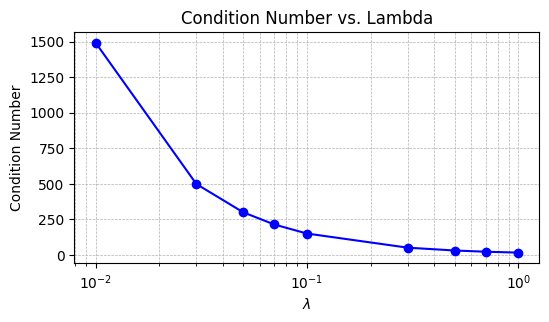

In [5]:
"Code for Step 2, part a"

# Lambda values to test
lambda_values = [0.01, 0.03, 0.05, 0.07, 0.1, 0.3, 0.5, 0.7, 1.0]

# Storing condition number for further plotting
condition_number_values = []

for lambdaa in lambda_values:

    # Compute P
    P = (1/m) * np.dot(F.T, F) + lambdaa * np.eye(n)

    # Compute eigenvalues
    eigenvalues, _ = eig(P)

    # Compute the condition number
    condition_number = cond(P)
    condition_number_values.append(condition_number)

    # Display the results for each lambda
    print(f"Results for lambda = {lambdaa}:")
    print(f"Largest Eigenvalue: {np.max(eigenvalues)}", f" Smallest Eigenvalue: {np.min(eigenvalues)}")
    # print(f"Smallest Eigenvalue (lambda_min): {np.min(eigenvalues)}")
    print(f"Condition Number: {condition_number}")
    print("-------------------------------------------------------------")

# Plotting
plt.figure(figsize=(6, 3))     # Create a single figure
plt.plot(lambda_values, condition_number_values, marker='o', color='b')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.xlabel('$\lambda$')
plt.ylabel('Condition Number')
plt.title('Condition Number vs. Lambda')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [6]:
"Code for Step 2, part b"

# Set regularization parameter (lambda)
lambdaa = 1

# Compute P
P = np.dot(F.T, F) + m * lambdaa * np.eye(n)

# Solve linear system to find x*
x_true = np.linalg.solve(P, np.dot(F.T, y))

# Compute f(x*)
f_x_true = 1 / (2*m) * np.linalg.norm(y - np.dot(F, x_true))**2 + 0.5 * lambdaa * np.linalg.norm(x_true)**2

# Display the results
print(f"Numerically Computed Vector x:\n {x_true}")
print(f"Value of f(x*): {f_x_true}")

Numerically Computed Vector x:
 [0.40896801 0.41960783 0.42259676 0.45689651 0.41970356 0.49330238
 0.43176995 0.48895397 0.49960638 0.46301188 0.49836571 0.5079453
 0.52882082 0.38948576 0.51220657 0.49805514 0.48571976 0.42475896
 0.41450675 0.42684515 0.54139744 0.48419979 0.49095906 0.49407944
 0.44194529 0.49412514 0.56211304 0.46122892 0.53360452 0.48740316
 0.50894592 0.57512225 0.45245012 0.52156615 0.42618412 0.48458623
 0.52230273 0.48440862 0.39729311 0.45355818 0.51225032 0.50359512
 0.45877999 0.42129758 0.5182656  0.50720071 0.57327654 0.42384183
 0.45766051 0.56253248 0.46229056 0.47124983 0.44167925 0.53646596
 0.41746859 0.42008275 0.49958976 0.48466134 0.46277318 0.38854045]
Value of f(x*): 7.724298122295499


### Step 3: Solve ridge regression using gradient descent

Now that we know the solution $x^\star$ and the largest and smallest eigenvalues of $P$ and we can explore the convergence of gradient descent with both constant stepsize and variable step size.

(a) Put your code from the above steps together into one new code block to implement gradient descent using the standard constant step-size to numerically find the vector $x_*$ that minimizes the ridge regression function and the minimum value of the function.

* Use $\lambda = 1.0$.

* Stopping criterion: $\|\nabla f(x)\|_2 < \epsilon = 10^{-3}$. The numpy command `linalg.norm` may be useful.

* Set the constant step size $\gamma$ using largest eigenvalue of $\nabla^2f(x)$.

(b) Display your results by plotting $\|x_t-x^\star\|_2$ versus the number of iterations $t$, where $x_t$ is the $t$-th iterate of gradient descent and $x^\star$ is the pre-computed ridge regression solution. The convergence speed of algorithms is displayed by plotting in a logarithmic scale. For this you may find the Python functions `semilogx, semilogy, loglog` useful. Your plot should be a straight line.

(c) For a quadratic objective is easy to solve $\gamma_t =\arg\min_\gamma f(x_t-\gamma \nabla f(x_t) )$ to find the optimal step size at step $t.$ The solution gives
$$
\gamma_t = \frac{g_t^Tg_t}{g_t^T P g_t}
$$
where $g_t = \nabla f(x_t)$ and $P$ is the symmetric PD matrix in the quadradtic.
Add to your code an implementation of gradient descent using the optimal variable step size (given above) to find the minimum and minimum value of the ridge regression function. Use the same parameters as in part (a).
To aid comparison, plot your convergence results on the same graph produced in part (b).


In [7]:
"Step 3 - Part a"

# Function to compute ridge regression loss and gradient
def ridge_regression_loss_gradient(F, x, y, lambdaa):
    m = len(y)
    residual = y - np.dot(F, x)
    loss = 1/(2*m) * np.dot(residual, residual) + 1/2 * lambdaa * np.dot(x, x)
    gradient = -1/m * np.dot(F.T, residual) + lambdaa * x
    return loss, gradient

# Function to perform gradient descent with a constant step size
def gradient_descent_constant_step(F, y, lambdaa, gamma, n_iter_max, eps, x_star):

    m, n = F.shape
    x = np.zeros(n)  # Initialize x to zeros
    losses = []      # List to store the loss at each iteration
    difference_with_true = [] # List to store the difference with true answer in each iteration

    for t in range(n_iter_max):

        loss, gradient = ridge_regression_loss_gradient(F, x, y, lambdaa)
        difference_with_true.append(np.linalg.norm(x - x_true))
        x = x - gamma * gradient
        losses.append(loss)


        if np.linalg.norm(gradient, 2) < eps:
          print(f"GD with constant step size converged in {t} iterations.")
          break
    else:
      print("Did not converge within the maximum number of iterations :(")

    return x, losses, t, difference_with_true

GD with constant step size converged in 79 iterations.


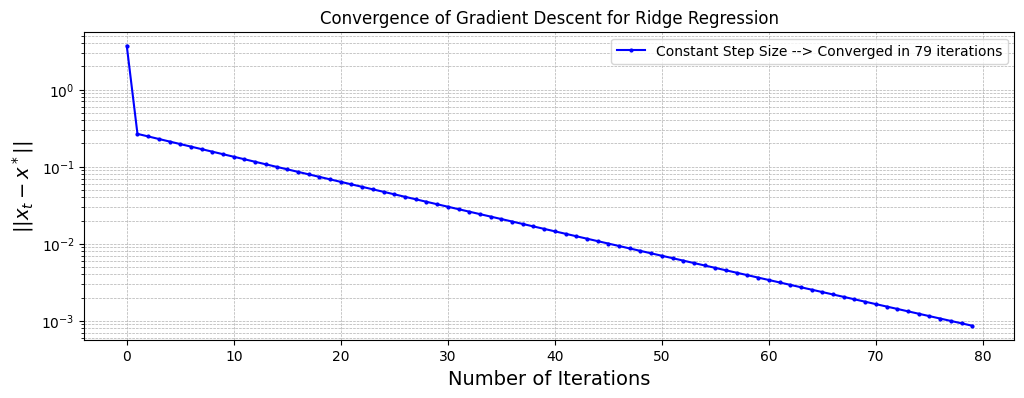

In [8]:
"Step 3 - Part b"

# Compute P
P = (1/m) * np.dot(F.T, F) + lambdaa * np.eye(n)

# Compute the largest eigenvalue of P
lambda_max = np.max(np.linalg.eigvals(P))

# Set the constant step size gamma using the largest eigenvalue
gamma = 1.0 / lambda_max

# Set stopping criterion
thresh = 1e-3

# Maximum number of iterations
n_iter_max = 1000

# Perform gradient descent with constant step size
x_optimal1, losses_constant_step, t1, difference_with_true_ans1 = gradient_descent_constant_step(F, y, lambdaa, gamma, n_iter_max, thresh, x_true)

# Plotting the convergence
plt.figure(figsize=(12, 4))     # Create a single figure
plt.semilogy(difference_with_true_ans1, label=f'Constant Step Size --> Converged in {t1} iterations', color='blue', marker='o', markersize=2)
plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('$||x_t - x^*||$', fontsize=14)
plt.title('Convergence of Gradient Descent for Ridge Regression', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Compute f(x^*)
f_x_optimal1 = 1 / (2*m) * np.linalg.norm(y - np.dot(F, x_optimal1))**2 + 0.5 * lambdaa * np.linalg.norm(x_optimal1)**2

In [9]:
"Step 3 - Part c"

def gradient_descent_variable_step(F, y, lambdaa, n_iter_max, eps, x_true):

    m, n = F.shape
    x = np.zeros(n)  # Initialize x to zeros
    losses = []      # List to store the loss at each iteration
    difference_with_true = [] # List to store the difference with true answer in each iteration

    for t in range(n_iter_max):
        loss, gradient = ridge_regression_loss_gradient(F, x, y, lambdaa)

        # Compute P
        P = (1/m) * np.dot(F.T, F) + lambdaa * np.eye(n)

        # Compute optimal step size gamma_t
        gamma_t = np.dot(gradient, gradient) / np.dot(np.dot(gradient, P), gradient)

        difference_with_true.append(np.linalg.norm(x - x_true))

        x = x - gamma_t * gradient  # Update x

        losses.append(loss)

        if np.linalg.norm(gradient, 2) < eps:
            print(f"GD with variable step size converged in {t} iterations.")
            break
    else:
        print("Did not converge within the maximum number of iterations :(")

    return x, losses, t, difference_with_true

GD with variable step size converged in 26 iterations.


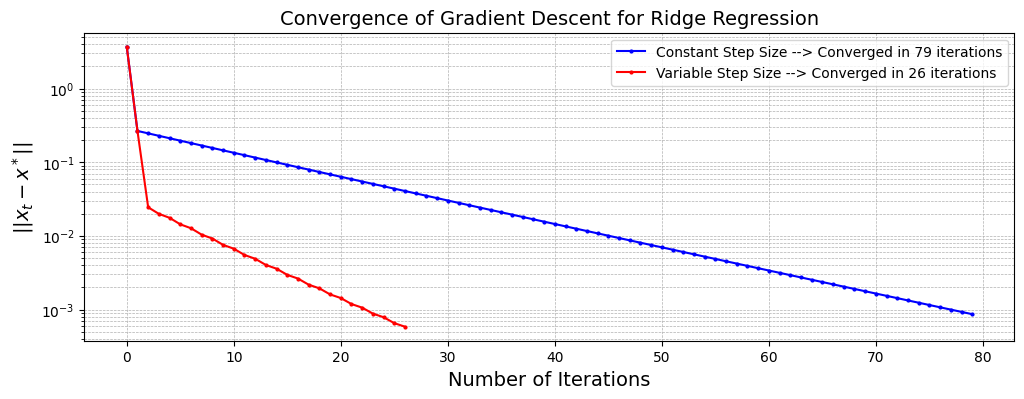

In [10]:
# Perform gradient descent with optimal step size
x_optimal2, losses_variable_step, t2, difference_with_true_ans2 = gradient_descent_variable_step(F, y, lambdaa, n_iter_max, thresh, x_true)

# Plotting the convergence
plt.figure(figsize=(12, 4))
plt.semilogy(difference_with_true_ans1, label=f'Constant Step Size --> Converged in {t1} iterations', color='blue', marker='o', markersize=2)
plt.semilogy(difference_with_true_ans2, label=f'Variable Step Size --> Converged in {t2} iterations', color='red', marker='o', markersize=2)
plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('$||x_t - x^*||$', fontsize=14)
plt.title('Convergence of Gradient Descent for Ridge Regression', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# Compute f(x^*)
f_x_optimal2 = 1 / (2*m) * np.linalg.norm(y - np.dot(F, x_optimal2))**2 + 0.5 * lambdaa * np.linalg.norm(x_optimal2)**2

In [11]:
# Display the results using GD with constant step size
print(f"Finding x using GD with constant step size \n x = {x_optimal1}")
print(f"Value of f(x*): {f_x_optimal1}")

# Display the results using GD with variable step size
print("---------------------------------------------")
print(f"Finding x using GD with variable step size \n x = {x_optimal2}")
print(f"Value of f(x*): {f_x_optimal2}")

# Display the true results
print("---------------------------------------------")
print(f"Finding x using normal equation (expected answer) \n x = {x_true}")
print(f"Value of f(x_true) (expected answer): {f_x_true}")

Finding x using GD with constant step size 
 x = [0.40918811 0.41964309 0.42273896 0.45685157 0.4196964  0.49327166
 0.43186401 0.48891233 0.49940169 0.46296041 0.49834829 0.50794074
 0.52868871 0.3896457  0.51231062 0.49789719 0.48564663 0.42491001
 0.41451246 0.42694917 0.54133059 0.48407792 0.49109883 0.49400285
 0.44204106 0.4941235  0.56201178 0.4612442  0.53353573 0.4874629
 0.50889683 0.57503874 0.45247385 0.52137538 0.4260062  0.48474924
 0.52218513 0.48430997 0.39736076 0.45354055 0.51241378 0.50353084
 0.45893213 0.42140952 0.51823302 0.50713037 0.57303882 0.42389465
 0.45772317 0.56250589 0.46221982 0.47133873 0.44171213 0.53638817
 0.41752293 0.42007843 0.49954064 0.48468526 0.46274932 0.38872755]
Value of f(x*): 7.72429847901564
---------------------------------------------
Finding x using GD with variable step size 
 x = [0.40914376 0.41962541 0.42264173 0.45690459 0.419741   0.49323822
 0.43185071 0.48890031 0.49950879 0.463025   0.4983559  0.50796063
 0.52869479 0.38959